In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

import skimage
from skimage import feature

blur = 0.9417717588785636


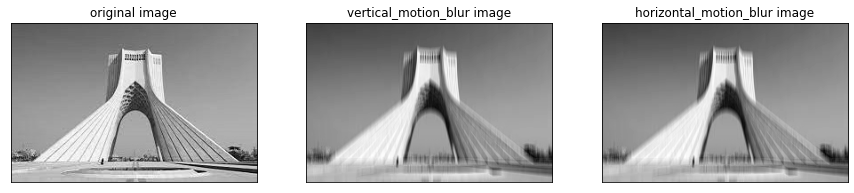

In [2]:
def create_horizontal_motion_blur(img):
  size = 9
  # generating the kernel
  kernel_motion_blur = np.transpose(np.ones(size)) / size
  # applying the kernel to the input image
  motion_blur_img = cv2.filter2D(img, -1, kernel_motion_blur)
  return motion_blur_img


def create_vertical_motion_blur(img):
  size = 9
  # generating the kernel   
  kernel_motion_blur = np.ones(size) / size
  # applying the kernel to the input image
  motion_blur_img = cv2.filter2D(img, -1, kernel_motion_blur)
  return motion_blur_img


img = np.array(cv2.imread(filename="azadi_tower.jpg", flags=cv2.IMREAD_GRAYSCALE)).astype('uint8')
img_norm = np.array(cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX))

[y, x] = img_norm.shape

B_Hor = create_horizontal_motion_blur(img)
B_Ver = create_vertical_motion_blur(img)

# Variation of the input image (Vertical direction)
D_F_Ver = np.abs(img_norm[:, 0:x-1] - img_norm[:, 1:x])
# Variation of the input image (Horizontal direction)
D_F_Hor = np.abs(img_norm[0:y-1, :] - img_norm[1:y, :])
# Variation of the Blurred image (Vertical direction)
D_B_Ver = np.abs(B_Ver[:, 0:x-1] - B_Ver[:, 1:x])
# Variation of the Blurred image (Horizontal direction)
D_B_Hor = np.abs(B_Hor[0:y-1, :] - B_Hor[1:y, :])
# Difference between two vertical variations of 2 images (input and blurred)
T_Ver = D_F_Ver - D_B_Ver
# Difference between two vertical horizontal of 2 images (input and blurred)
T_Hor = D_F_Hor - D_B_Hor


V_Ver = np.maximum(np.zeros_like(T_Ver),T_Ver)
V_Hor = np.maximum(np.zeros_like(T_Hor),T_Hor)

S_D_Ver = np.sum(np.sum(D_F_Ver[1:y-1, 1:x-1]))
S_D_Hor = np.sum(np.sum(D_F_Hor[1:y-1, 1:x-1]))
S_V_Ver = np.sum(np.sum(V_Ver[1:y-1, 1:x-1]))
S_V_Hor = np.sum(np.sum(V_Hor[1:y-1, 1:x-1]))

blur_F_Ver = (S_D_Ver - S_V_Ver) / S_D_Ver
blur_F_Hor = (S_D_Hor - S_V_Hor) / S_D_Hor
blur = max(blur_F_Ver, blur_F_Hor)


print('blur = {}'.format(blur))

fig, axes= plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('original image')

axes[1].imshow(B_Ver, cmap='gray')
axes[1].set_title('vertical_motion_blur image')

axes[2].imshow(B_Hor, cmap='gray')
axes[2].set_title('horizontal_motion_blur image')


for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
